In [327]:
import numpy as np

from keras.datasets import boston_housing
from sklearn.preprocessing import normalize

%run Lab2_NN.ipynb

In [328]:
def load_data():
  (x_train, y_train), (x_test, y_test) = boston_housing.load_data()

  # condition data to be in a format you need to use

  x_train = normalize(x_train, norm='max', axis=0)
  x_test = normalize(x_test, norm='max', axis=0)
    
  return (x_train, y_train), (x_test, y_test)

In [332]:
import matplotlib.pyplot as plt

%matplotlib inline 

def plot_loss(losses, test_loss, epochs):
  fig, ax = plt.subplots()
  time = np.arange(0, epochs, 1)
  ax.plot(time, losses)

  # test loss
  y = test_loss
  plt.axhline(y=y, color="orange")
  text = 'test loss: ' + str(np.around(y, decimals=3))
  plt.annotate(text, xy=(2, y), xytext=(3, y+50),
    arrowprops=dict(facecolor='black', shrink=0.05),
  )

  ax.set(xlabel='iteration', ylabel='loss',
       title='Loss over time')
  plt.show()

In [325]:
def main():
  (x_train, y_train), (x_test, y_test) = load_data()
    
  # linear network
  # plot training and test loss over time in jupyter notebook
  # plot training and test accuracy over time in jupyter notebook

  shapes = [x_train.shape[1], 1]
  outputs = ["linear"]
  model = initialize_weights(shapes, outputs)

  train_losses = []

  # what's the alpha you should use?

  alpha = 0.3
  epochs = 300
    
  # Training Set
  for i in range(epochs):
    fwd_results = forward(x_train, model)
    loss, dweights = backward(y_train, fwd_results, model, "mse")
    update(model, dweights, alpha)
    train_losses.append(loss)

  # Test Set
  test_results = forward(x_test, model)
  test_loss, _ = backward(y_test, test_results, model, "mse")

  # Plot
  plot_loss(train_losses, test_loss, epochs)

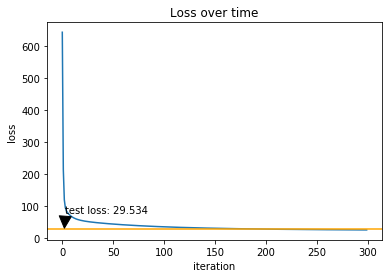

In [333]:
if __name__ == "__main__":
  main()